In [ ]:
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.5 MB/s eta 0:00:00


Saving segmentar (1).jpg to segmentar (1) (1).jpg


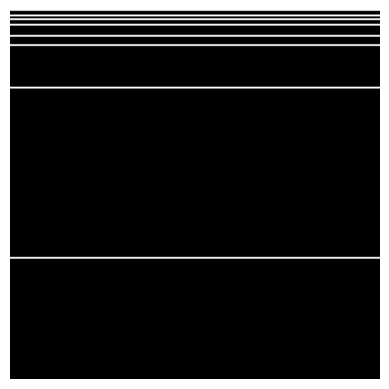

In [ ]:
import requests
import torch
from PIL import Image
from transformers import AutoImageProcessor, Mask2FormerForUniversalSegmentation
from google.colab import files
import numpy as np

# load Mask2Former fine-tuned on ADE20k semantic segmentation
processor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-large-ade-semantic")
model = Mask2FormerForUniversalSegmentation.from_pretrained("facebook/mask2former-swin-large-ade-semantic")

# Opción 1: Cargar una imagen desde una URL
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# Opción 2: Subir una imagen directamente en Google Colab
# Seleccionar y cargar la imagen desde tu dispositivo local
uploaded = files.upload()

# Obtener la ruta de la imagen cargada
image_path = list(uploaded.keys())[0]

# Cargar la imagen subida en Colab
image = Image.open(image_path)

# Procesar la imagen y realizar la inferencia
inputs = processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

# Obtener el mapa semántico predicho
predicted_semantic_map = processor.post_process_semantic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]

# Visualizar el resultado
num_classes = predicted_semantic_map.shape[0]
palette = np.random.randint(0, 255, size=(num_classes, 3), dtype=np.uint8)
colored_mask = palette[predicted_semantic_map]

plt.imshow(colored_mask)
plt.axis('off')
plt.show()

# Ruta donde deseas guardar las imágenes segmentadas
ruta_guardado = "/content/Seg_sabes"

# Guardar la imagen segmentada
imagen_guardada = Image.fromarray(colored_mask)
imagen_guardada.save(ruta_guardado + "Unideg_Segmentado.png")



Saving segmentar (1).jpg to segmentar (1).jpg


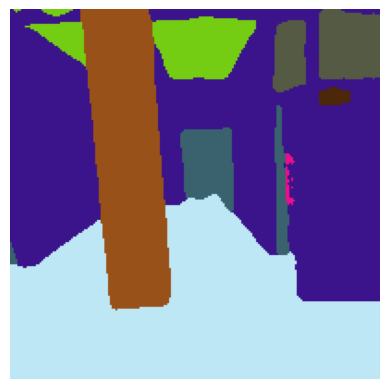

¿Deseas cargar otra imagen? (y/n): y


Saving segmentar (2).jpg to segmentar (2).jpg


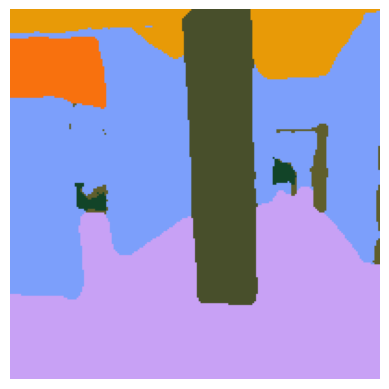

¿Deseas cargar otra imagen? (y/n): y


Saving segmentar (3).jpg to segmentar (3).jpg


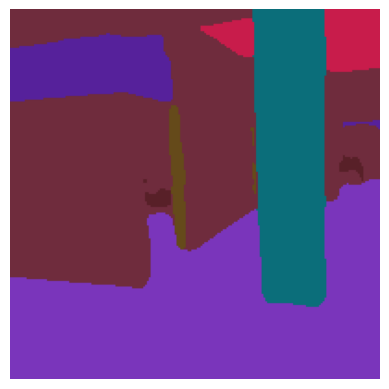

¿Deseas cargar otra imagen? (y/n): y


Saving segmentar (4).jpg to segmentar (4).jpg


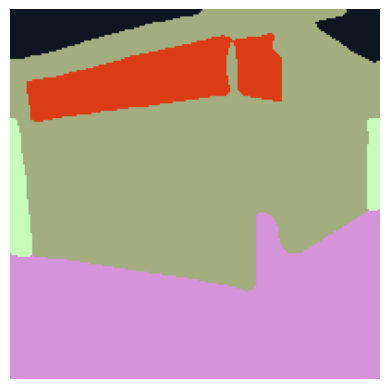

¿Deseas cargar otra imagen? (y/n): y


Saving segmentar (5).jpg to segmentar (5).jpg


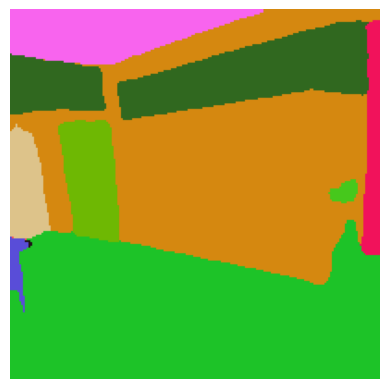

¿Deseas cargar otra imagen? (y/n): y


Saving segmentar (6).jpg to segmentar (6).jpg


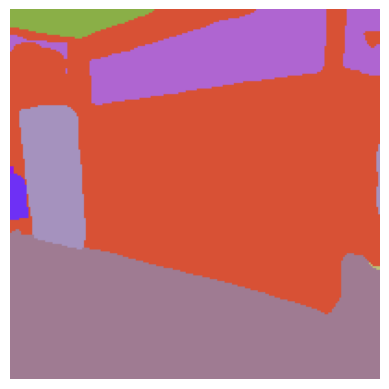

¿Deseas cargar otra imagen? (y/n): y


Saving segmentar (7).jpg to segmentar (7).jpg


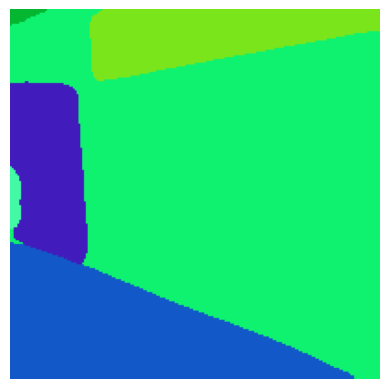

¿Deseas cargar otra imagen? (y/n): no


In [ ]:
import requests
import torch
from PIL import Image
from transformers import AutoImageProcessor, Mask2FormerForUniversalSegmentation
import numpy as np


continuar_subiendo = True

while continuar_subiendo:

    url = "http://images.cocodataset.org/val2017/000000039769.jpg"
    image = Image.open(requests.get(url, stream=True).raw)


    uploaded = files.upload()

    image_path = list(uploaded.keys())[0]

    image = Image.open(image_path)

    inputs = processor(images=image, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**inputs)


    predicted_semantic_map = processor.post_process_semantic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]

    num_classes = predicted_semantic_map.shape[0]
    palette = np.random.randint(0, 255, size=(num_classes, 3), dtype=np.uint8)
    colored_mask = palette[predicted_semantic_map]

    plt.imshow(colored_mask)
    plt.axis('off')
    plt.show()


    ruta_guardado = "/content/Seg_sabes"


    imagen_guardada = Image.fromarray(colored_mask)
    imagen_guardada.save(ruta_guardado + "Unideg_Segmentado.png")


    respuesta = input("¿Deseas cargar otra imagen? (y/n): ")
    if respuesta.lower() != 'y':
        continuar_subiendo = False


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# La variable "predicted_semantic_map" contiene el mapa semántico con las etiquetas predichas para cada píxel.
# La siguiente línea crea una imagen visual usando una paleta de colores aleatorios para representar cada clase.
# Si deseas utilizar una paleta de colores específica, puedes definirla según tus necesidades.

num_classes = predicted_semantic_map.shape[0]
palette = np.random.randint(0, 255, size=(num_classes, 3), dtype=np.uint8)

colored_mask = palette[predicted_semantic_map]

# La imagen resultante es de la forma (height, width, 3) con valores de píxeles en formato RGB.



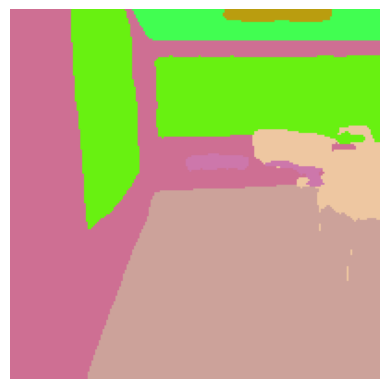

In [ ]:
plt.imshow(colored_mask)
plt.axis('off')
plt.show()